<a href="https://colab.research.google.com/github/ridabayi/Chest-X-Ray-Covid-19-Dtection/blob/main/ML_for_Covid19_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Advanced classification using machine learning

In [ ]:
!pip install mahotas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 15.8 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade scikit-learn

In [ ]:
import subprocess
subprocess.call(["ls", "-l"])

0

In [ ]:
import mahotas as mh
import seaborn as sns
from matplotlib import pyplot as plt
from glob import glob
import os
import numpy as np
import pandas as pd

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

In [ ]:
import requests

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0EZMUK/LargeData/Covid19-dataset.zip"
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Open a file for writing the data
    with open('covid19-dataset.zip', 'wb') as file:
        # Write the data to the file
        file.write(response.content)
    print("Data downloaded successfully")
else:
    print("Failed to download data")

Data downloaded successfully


In [ ]:
!unzip /content/covid19-dataset.zip

In [ ]:
IMM_SIZE = 224

In [ ]:
def get_data(folder):
    class_names = [f for f in os.listdir(folder) if not f.startswith('.')] # ctreate a list of SubFolders
    data = []
    print(class_names)
    for t, f in enumerate(class_names):
        images = glob(folder + "/" + f + "/*") # create a list of files
        print("Downloading: ", f)
        fig = plt.figure(figsize = (12,12))
        for im_n, im in enumerate(images):
            plt.gray() # set grey colormap of images
            image = mh.imread(im)
            if len(image.shape) > 2:
                image = mh.resize_to(image, [IMM_SIZE, IMM_SIZE, image.shape[2]]) # resize of RGB and png images
            else:
                image = mh.resize_to(image, [IMM_SIZE, IMM_SIZE]) # resize of grey images
            if len(image.shape) > 2:
                image = mh.colors.rgb2grey(image[:,:,:3], dtype = np.uint8)  # change of colormap of images alpha chanel delete
            plt.subplot(int(len(images)/5)+1,5,im_n+1) # create a table of images
            plt.imshow(image)
            data.append([image, f])
        plt.show()

    return np.array(data)

['Covid', 'Normal', 'Viral Pneumonia']
Downloading:  Covid


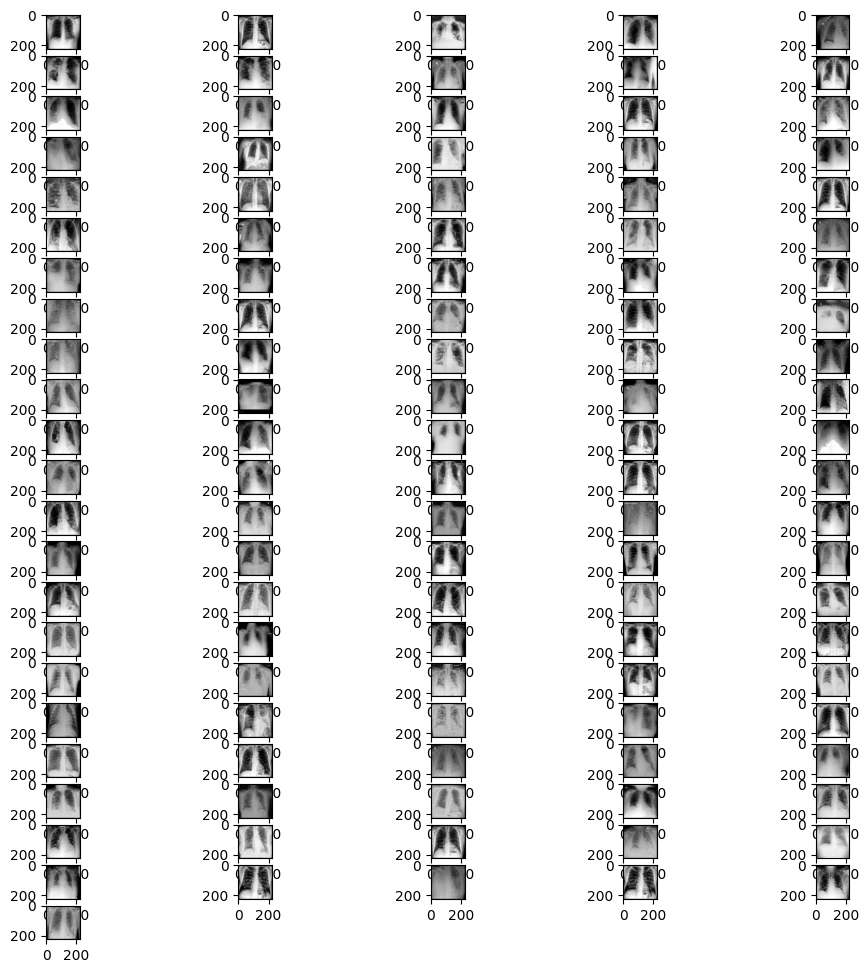

Downloading:  Normal


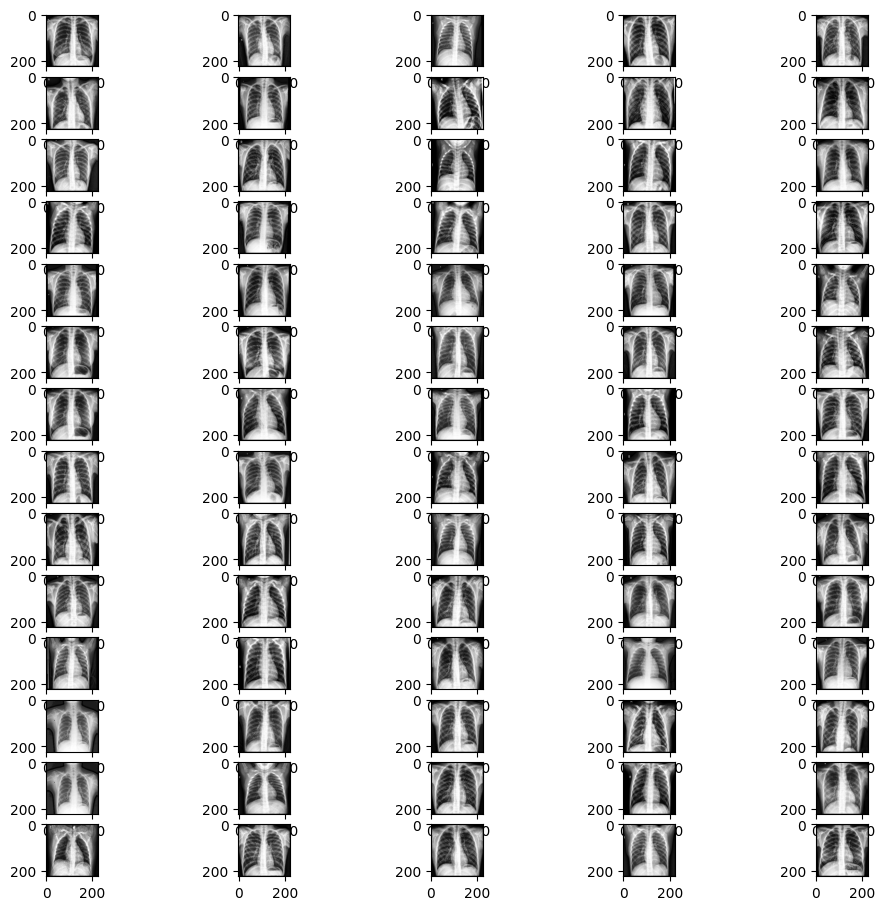

Downloading:  Viral Pneumonia


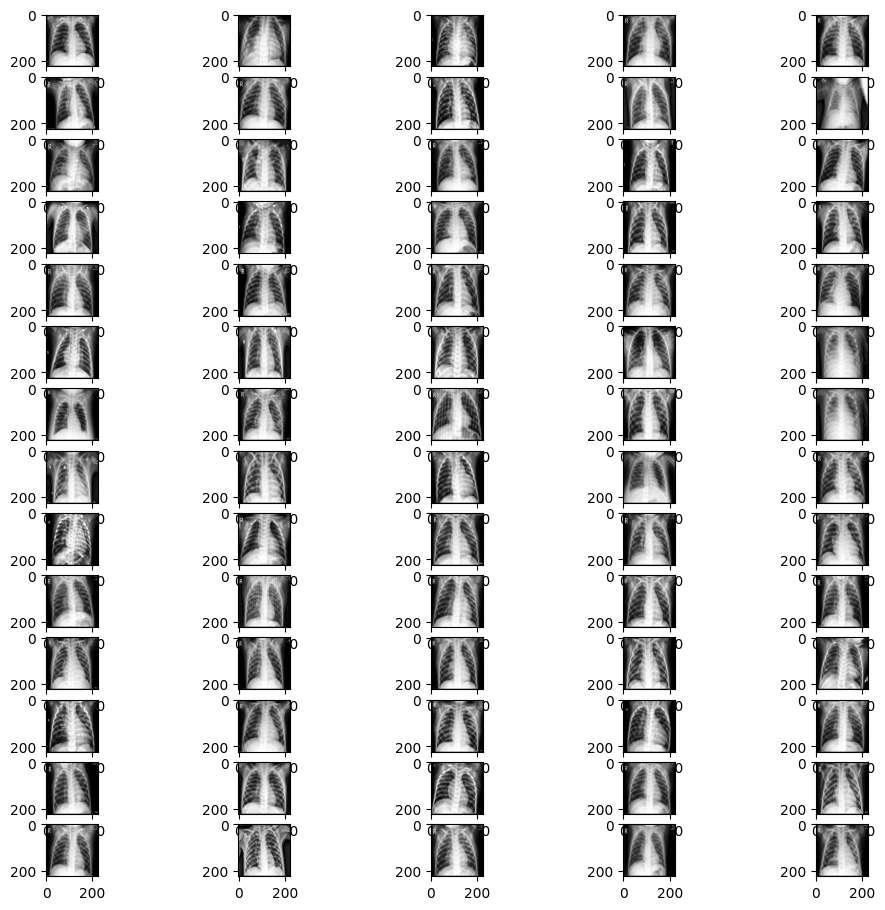

<ipython-input-28-7ae8d849c612>:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


['Covid', 'Normal', 'Viral Pneumonia']
Downloading:  Covid


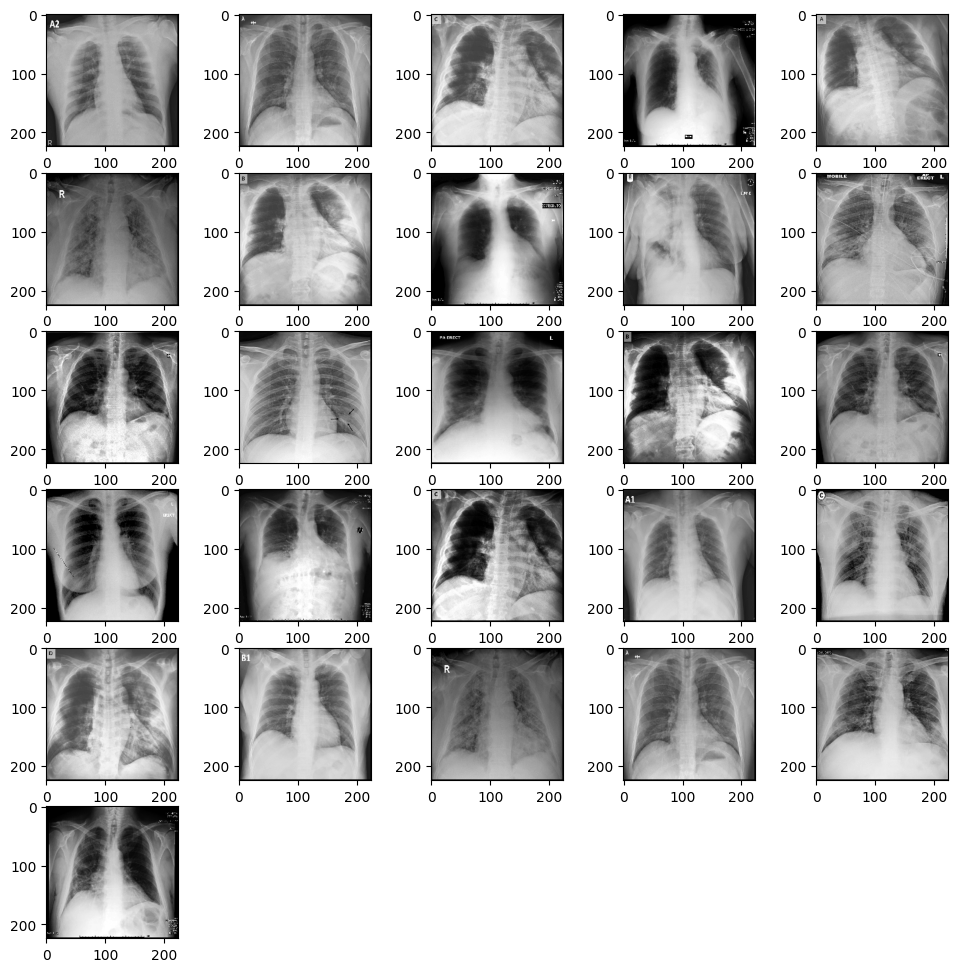

Downloading:  Normal


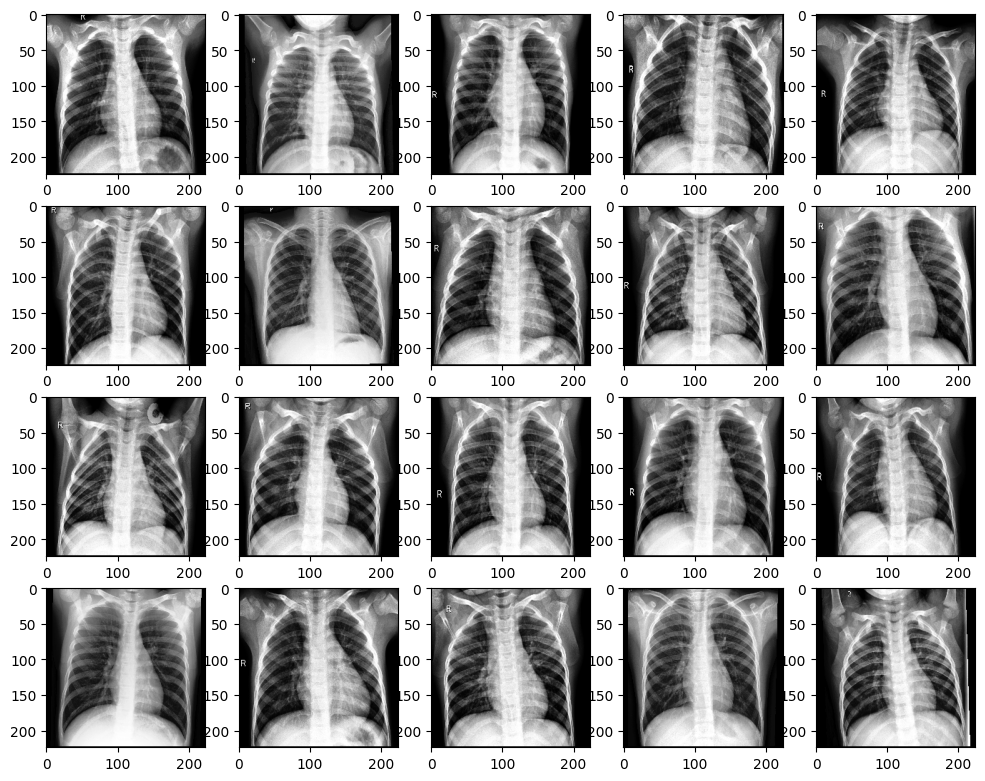

Downloading:  Viral Pneumonia


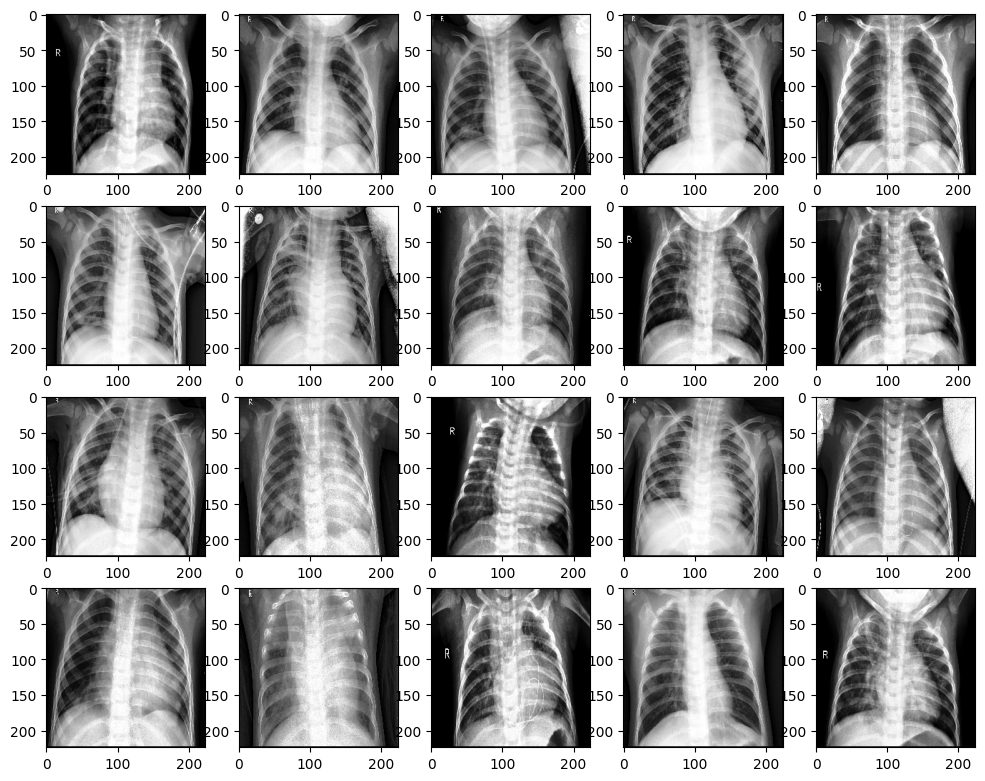

In [ ]:
d = "Covid19-dataset/train"
train = get_data(d)

d = "Covid19-dataset/test"
val = get_data(d)

In [ ]:
print("Train shape", train.shape) # Size of the training DataSet
print("Test shape", val.shape) # Size of the test DataSet
print("Image size", train[0][0].shape) # Size of image

Train shape (251, 2)
Test shape (66, 2)
Image size (224, 224)


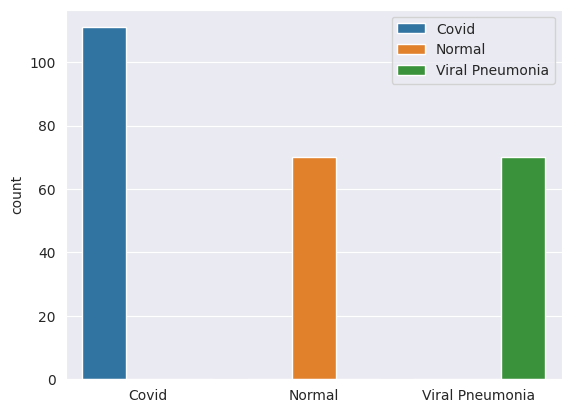

In [ ]:
l = [i[1] for i in train]
sns.set_style('darkgrid')
sns.countplot(x=l, hue=l)

# Show the plot
plt.show()

Text(0.5, 1.0, 'Viral Pneumonia')

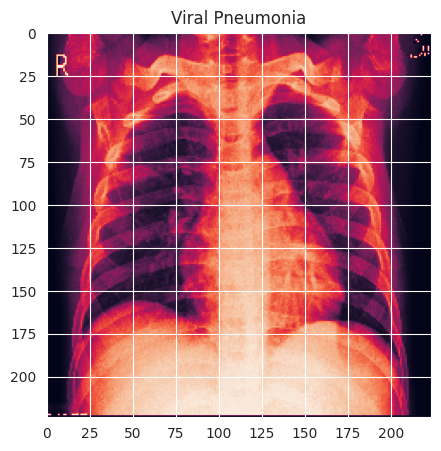

In [ ]:
plt.figure(figsize = (5,5))
plt.imshow(train[np.where(train[:,1] == 'Viral Pneumonia')[0][0]][0])
plt.title('Viral Pneumonia')

Text(0.5, 1.0, 'Covid')

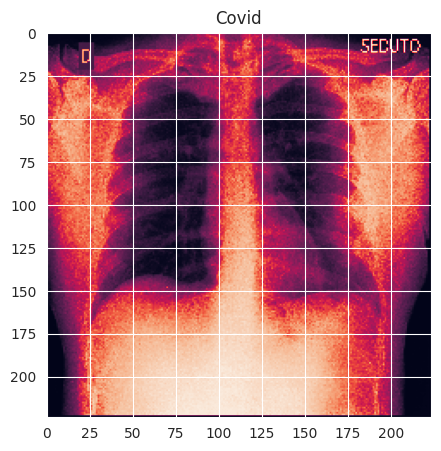

In [ ]:
plt.figure(figsize = (5,5))
plt.imshow(train[np.where(train[:,1] == 'Covid')[0][0]][0])
plt.title('Covid')

In [ ]:
def create_features(data):
    features = []
    labels = []
    for image, label in data:
        features.append(mh.features.haralick(image).ravel())
        labels.append(label)
    features = np.array(features)
    labels = np.array(labels)
    return (features, labels)

In [ ]:
features_train, labels_train = create_features(train)
features_test, labels_test = create_features(val)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training DataSet accuracy: 89.6%
Test DataSet accuracy: 84.8%


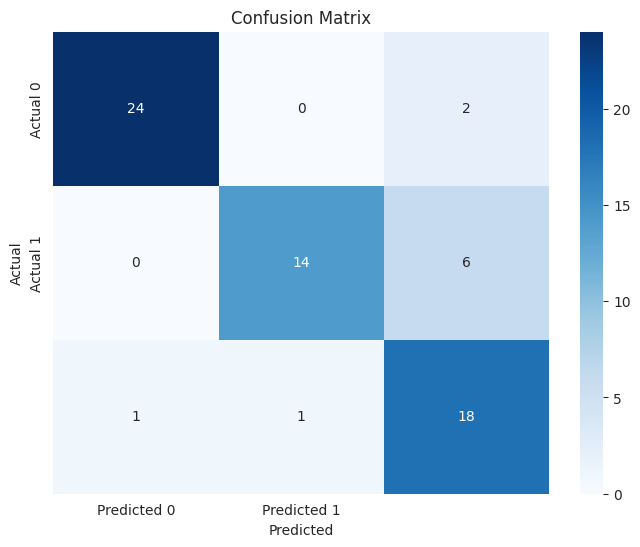

In [ ]:
# Create the pipeline
clf = Pipeline([('preproc', StandardScaler()), ('classifier', LogisticRegression())])

# Fit the pipeline on the training data
clf.fit(features_train, labels_train)

# Calculate accuracies
scores_train = clf.score(features_train, labels_train)
scores_test = clf.score(features_test, labels_test)

# Print accuracies
print('Training DataSet accuracy: {:.1%}'.format(scores_train))
print('Test DataSet accuracy: {:.1%}'.format(scores_test))

# Predict on the test set
predictions = clf.predict(features_test)

# Create confusion matrix
cm = confusion_matrix(labels_test, predictions)

# Display the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
names = ["Logistic Regression", "Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]
scores_train = []
scores_test = []
for name, clf in zip(names, classifiers):
    print("Fitting:", name)
    clf = Pipeline([('preproc', StandardScaler()), ('classifier', clf)])
    clf.fit(features_train, labels_train)
    score_train = clf.score(features_train, labels_train)
    score_test = clf.score(features_test, labels_test)
    scores_train.append(score_train)
    scores_test.append(score_test)

Fitting: Logistic Regression
Fitting: Nearest Neighbors
Fitting: Linear SVM
Fitting: RBF SVM
Fitting: Gaussian Process


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting: Decision Tree
Fitting: Random Forest
Fitting: Neural Net
Fitting: AdaBoost
Fitting: Naive Bayes
Fitting: QDA


/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [ ]:
res = pd.DataFrame(index = names)
res['scores_train'] = scores_train
res['scores_test'] = scores_test
res.columns = ['Test','Train']
res.index.name = "Classifier accuracy"
pd.options.display.float_format = '{:,.2f}'.format
print(res)

                     Test  Train
Classifier accuracy             
Logistic Regression  0.90   0.85
Nearest Neighbors    0.87   0.70
Linear SVM           0.79   0.71
RBF SVM              1.00   0.48
Gaussian Process     0.79   0.67
Decision Tree        0.90   0.64
Random Forest        0.84   0.61
Neural Net           0.92   0.82
AdaBoost             0.86   0.58
Naive Bayes          0.67   0.59
QDA                  1.00   0.58


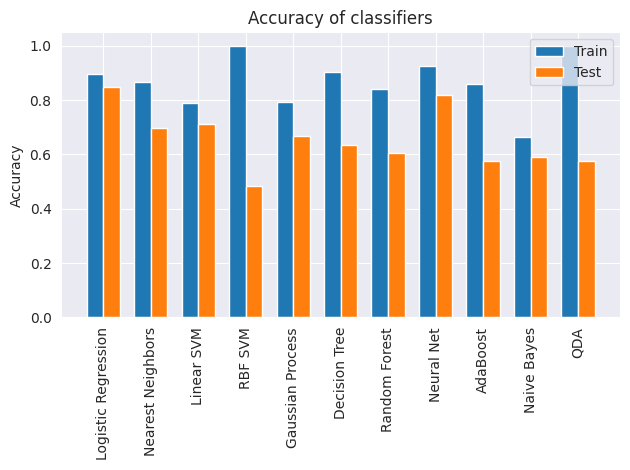

In [ ]:
x = np.arange(len(names))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, scores_train, width, label='Train')
rects2 = ax.bar(x + width/2, scores_test, width, label='Test')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy of classifiers')
ax.set_xticks(x)
plt.xticks(rotation = 90)
ax.set_xticklabels(names)
ax.legend()

fig.tight_layout()

plt.show()

## **Construction and fitting of a convolutional neural network**

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
import tensorflow as tf
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

# Reshaping input images
x_train = x_train.reshape(-1, IMM_SIZE, IMM_SIZE, 1)
x_val = x_val.reshape(-1, IMM_SIZE, IMM_SIZE, 1)

# Creating a dictionary of clases
lab = {}
for i, l in enumerate(set(y_train)):
    lab[l] = i


y_train = np.array([lab[l] for l in y_train])
y_val = np.array([lab[l] for l in y_val])

In [ ]:
print("Shape of the input DataSet:", x_train.shape)
print("Shape of the output DataSet:", y_train.shape)
print("Dictionary of classes:", lab)

Shape of the input DataSet: (251, 224, 224, 1)
Shape of the output DataSet: (251,)
Dictionary of classes: {'Viral Pneumonia': 0, 'Covid': 1, 'Normal': 2}


In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [ ]:
model = Sequential()
model.add(Conv2D(32,1,padding="same", activation="relu", input_shape=(IMM_SIZE,IMM_SIZE,1)))
model.add(MaxPool2D())

model.add(Conv2D(32, 1, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 1, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(3, activation="softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 224, 224, 32)      64        
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 112, 112, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 32)      1056      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 56, 56, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 56, 56, 64)        2112      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 28, 28, 64)       

In [ ]:
!pip install pydot
!pip install graphviz

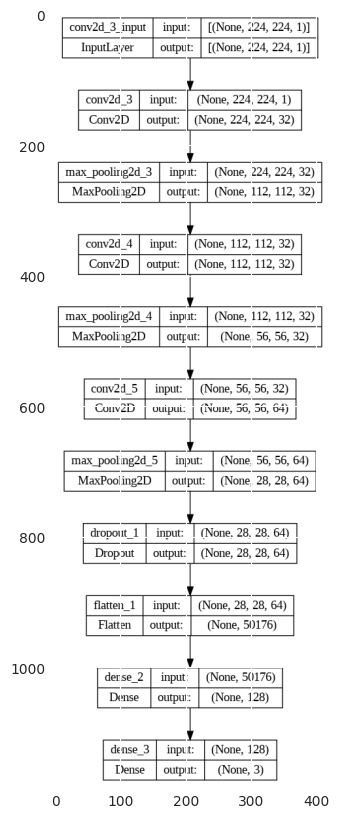

In [ ]:
from tensorflow.keras.utils import plot_model
# Plot the model architecture
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Display the plot
img = plt.imread('model_plot.png')
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.show()

In [ ]:
learning_rate = 0.000001
opt = Adam(learning_rate=learning_rate)

model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
fitting = True
fitting_save = True
epochs = 200

import pickle

if fitting:
    history = model.fit(x_train,y_train,epochs = epochs , validation_data = (x_val, y_val), shuffle = True)
    if fitting_save:
    # serialize model to JSON
        model_json = model.to_json()
        with open("model.json", "w") as json_file:
            json_file.write(model_json)
        # serialize weights to HDF5
        model.save_weights("model.h5")
        print("Saved model to disk")
        with open('history.pickle', 'wb') as f:
            pickle.dump(history.history, f)
        with open('lab.pickle', 'wb') as f:
            pickle.dump(lab, f)
# load model
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
# load weights into a new model
model.load_weights("model.h5")
with open('history.pickle', 'rb') as f:
    history = pickle.load(f)
print("Loaded model from disk")

Epoch 1/200
8/8 [==============================] - 1s 72ms/step - loss: 0.6113 - accuracy: 0.8685 - val_loss: 0.7513 - val_accuracy: 0.6061
Epoch 2/200
8/8 [==============================] - 1s 74ms/step - loss: 0.6063 - accuracy: 0.8685 - val_loss: 0.7499 - val_accuracy: 0.6212
Epoch 3/200
8/8 [==============================] - 1s 67ms/step - loss: 0.6137 - accuracy: 0.8526 - val_loss: 0.7485 - val_accuracy: 0.6212
Epoch 4/200
8/8 [==============================] - 0s 63ms/step - loss: 0.6087 - accuracy: 0.8566 - val_loss: 0.7473 - val_accuracy: 0.6212
Epoch 5/200
8/8 [==============================] - 1s 69ms/step - loss: 0.6112 - accuracy: 0.8645 - val_loss: 0.7459 - val_accuracy: 0.6212
Epoch 6/200
8/8 [==============================] - 1s 68ms/step - loss: 0.5981 - accuracy: 0.8765 - val_loss: 0.7447 - val_accuracy: 0.6212
Epoch 7/200
8/8 [==============================] - 1s 69ms/step - loss: 0.6024 - accuracy: 0.8606 - val_loss: 0.7434 - val_accuracy: 0.6212
Epoch 8/200
8/8 [===

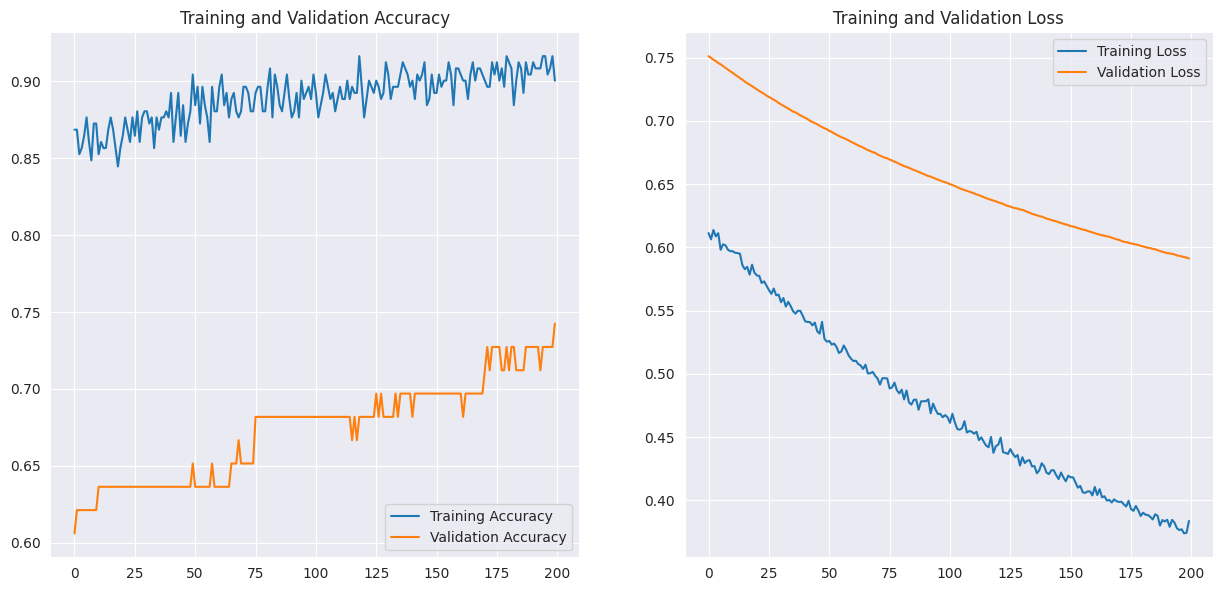

In [ ]:
acc = history['accuracy']
val_acc = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

3/3 [==============================] - 0s 10ms/step
              precision    recall  f1-score   support

           0       0.62      0.75      0.68        20
           1       0.86      0.92      0.89        26
           2       0.71      0.50      0.59        20

    accuracy                           0.74        66
   macro avg       0.73      0.72      0.72        66
weighted avg       0.74      0.74      0.74        66

    0   1   2
0  15   3   2
1   0  24   2
2   9   1  10


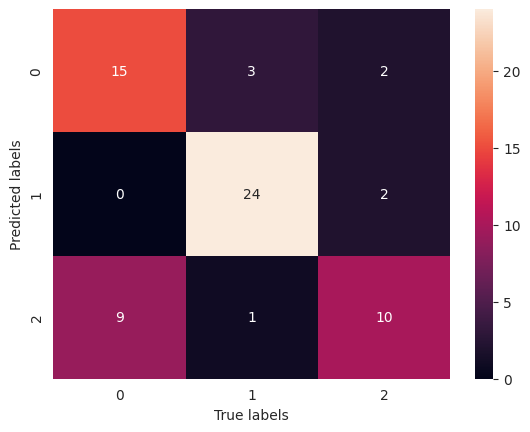

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your model is a Keras model named 'model' and lab is a dictionary mapping class indices to labels

# Predictions
predictions = np.argmax(model.predict(x_val), axis=1)

# Classification report
# Convert dictionary values to list of strings
class_labels = list(map(str, lab.values()))

# Classification report
print(classification_report(y_val, predictions, target_names=class_labels))

# Confusion matrix
cm = confusion_matrix(y_val, predictions)
cm_df = pd.DataFrame(cm, index=lab.values(), columns=lab.values())
print(cm_df)

# Heatmap
sns.heatmap(cm, annot=True, fmt="d", xticklabels=list(lab.values()), yticklabels=list(lab.values()))
plt.xlabel("True labels")
plt.ylabel("Predicted labels")
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score

# Accuracy for the training set
y_train_pred = np.argmax(model.predict(x_train), axis=1)
accuracy_train = accuracy_score(y_train, y_train_pred)
print(f'Training accuracy: {accuracy_train:.2%}')

# Accuracy for the validation set
y_val_pred = np.argmax(model.predict(x_val), axis=1)
accuracy_val = accuracy_score(y_val, y_val_pred)
print(f'Validation accuracy: {accuracy_val:.2%}')

8/8 [==============================] - 0s 13ms/step
Training accuracy: 92.03%
3/3 [==============================] - 0s 12ms/step
Validation accuracy: 74.24%


In [ ]:
def diagnosis(file, model, lab, imm_size=224):
    try:
        # Load image
        image = mh.imread(file)

        # Preprocess image
        if len(image.shape) > 2:
            image = mh.resize_to(image, [imm_size, imm_size, image.shape[2]])
        else:
            image = mh.resize_to(image, [imm_size, imm_size])

        if len(image.shape) > 2:
            image = mh.colors.rgb2grey(image[:,:,:3], dtype=np.uint8)

        # Display image
        plt.gray()
        plt.imshow(image)
        plt.show()

        # Normalize data
        image = np.array(image) / 255

        # Resize input images
        image = image.reshape(-1, imm_size, imm_size, 1)

        # Predict diagnosis probabilities
        predictions = model.predict(image)

        # Get predicted class label
        predicted_class_index = np.argmax(predictions)
        diagnosis_label = list(lab.keys())[predicted_class_index]

        return diagnosis_label, predictions[0]

    except Exception as e:
        print(f"Error processing image: {e}")
        return None

# Example usage:
# diagnosis_label, predictions = diagnosis("your_image_file.png", your_model, your_lab)
# print(f"Diagnosis: {diagnosis_label}")
# print(f"Predictions: {predictions}")


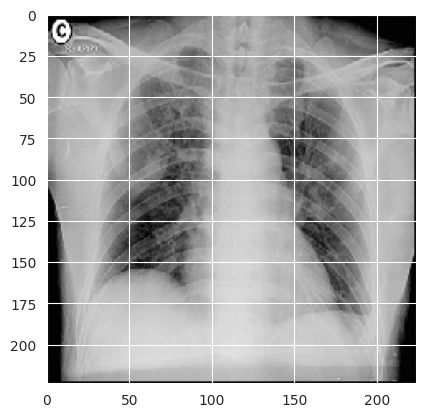

1/1 [==============================] - 0s 44ms/step
Diagnosis is: ('Covid', array([0.03648466, 0.74964577, 0.21386954], dtype=float32))


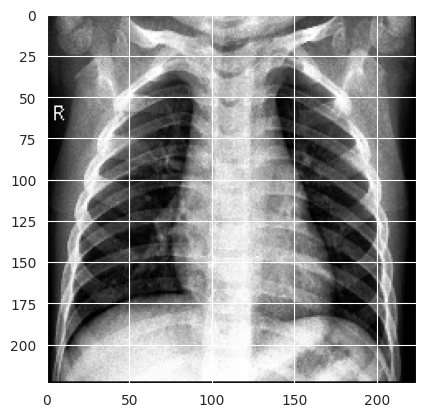

1/1 [==============================] - 0s 37ms/step
Diagnosis is: ('Normal', array([0.33262846, 0.29329425, 0.37407726], dtype=float32))


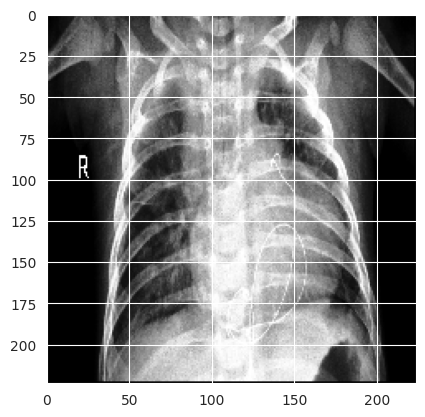

1/1 [==============================] - 0s 17ms/step
Diagnosis is: ('Viral Pneumonia', array([0.7900142 , 0.02341061, 0.18657517], dtype=float32))


In [ ]:
print("Diagnosis is:", diagnosis("Covid19-dataset/test/Covid/0120.jpg", model, lab))
print("Diagnosis is:", diagnosis("Covid19-dataset/test/Normal/0105.jpeg", model, lab))
print("Diagnosis is:", diagnosis("Covid19-dataset/test/Viral Pneumonia/0111.jpeg", model, lab))